In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv("/home/khushal/Python/data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## HANDLING MISSING DATA

In [6]:
data.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [7]:
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [8]:
data.isnull().values.any()

True

In [9]:
data.columns[data.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

In [10]:
len(data.columns[data.isnull().any()])

1

In [11]:
data = data.drop(columns= 'Unnamed: 32')

In [12]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
data.shape

(569, 32)

## Working with catagorical data

In [14]:
data.select_dtypes(include='object' )

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [15]:
data.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [16]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [17]:
data['diagnosis'].nunique()

2

In [18]:
d = data

## ONE HOT ENCODING

In [19]:
dummy = pd.get_dummies(data = d.diagnosis, drop_first=True).astype(int)
dummy

,M
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [20]:
dataset = pd.concat([d,dummy], axis = 'columns').drop(columns='diagnosis').rename(columns={'M':'diagnosis'})
dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


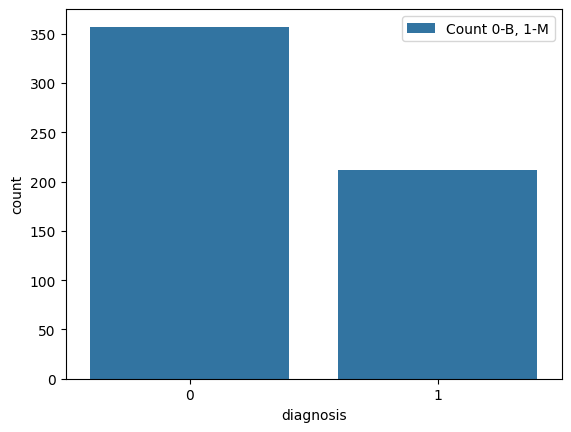

In [21]:
## COUNT PLOT
sns.countplot(x = 'diagnosis', data = dataset, label = 'Count 0-B, 1-M')
plt.show()

In [22]:
print(((dataset.diagnosis == 0).sum()))

357


In [23]:
## Correlation Matrix and Heatmap

In [24]:
dataset2 = dataset.drop(columns='diagnosis')
dataset2

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: >

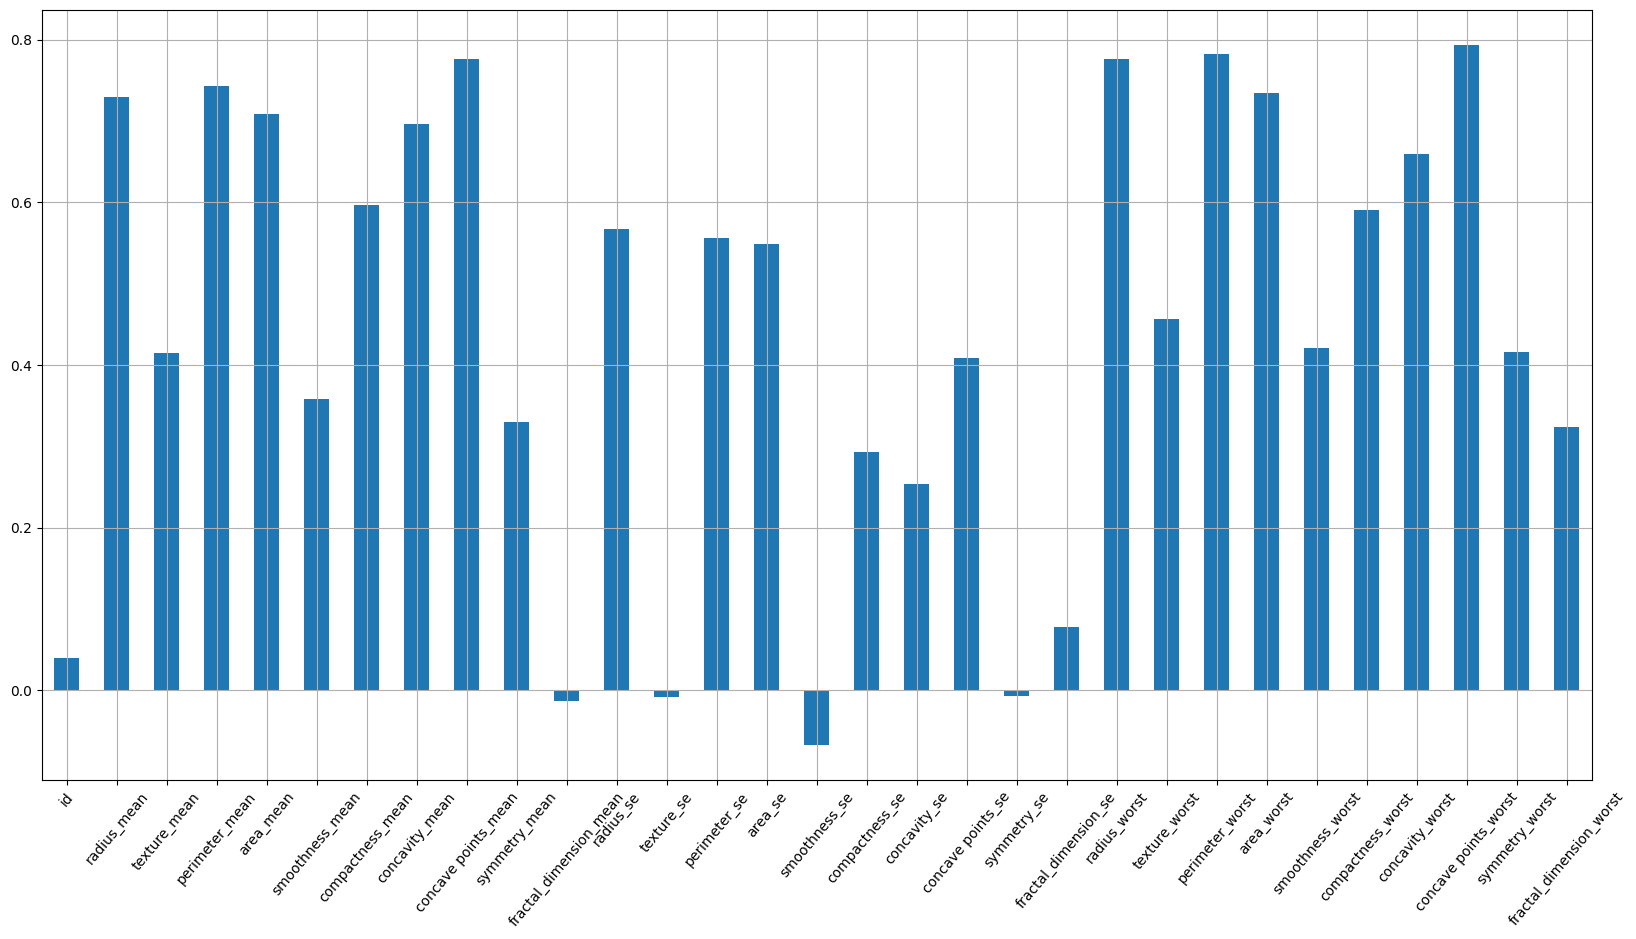

In [25]:
dataset2.corrwith(dataset['diagnosis']).plot.bar(
    figsize = (20,10), rot =50, grid= True, label = "Corelation with independent variable"
)

## Corelation shown without a heamap


In [26]:
corr = dataset.corr()
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


## HEATMAP 

<Axes: >

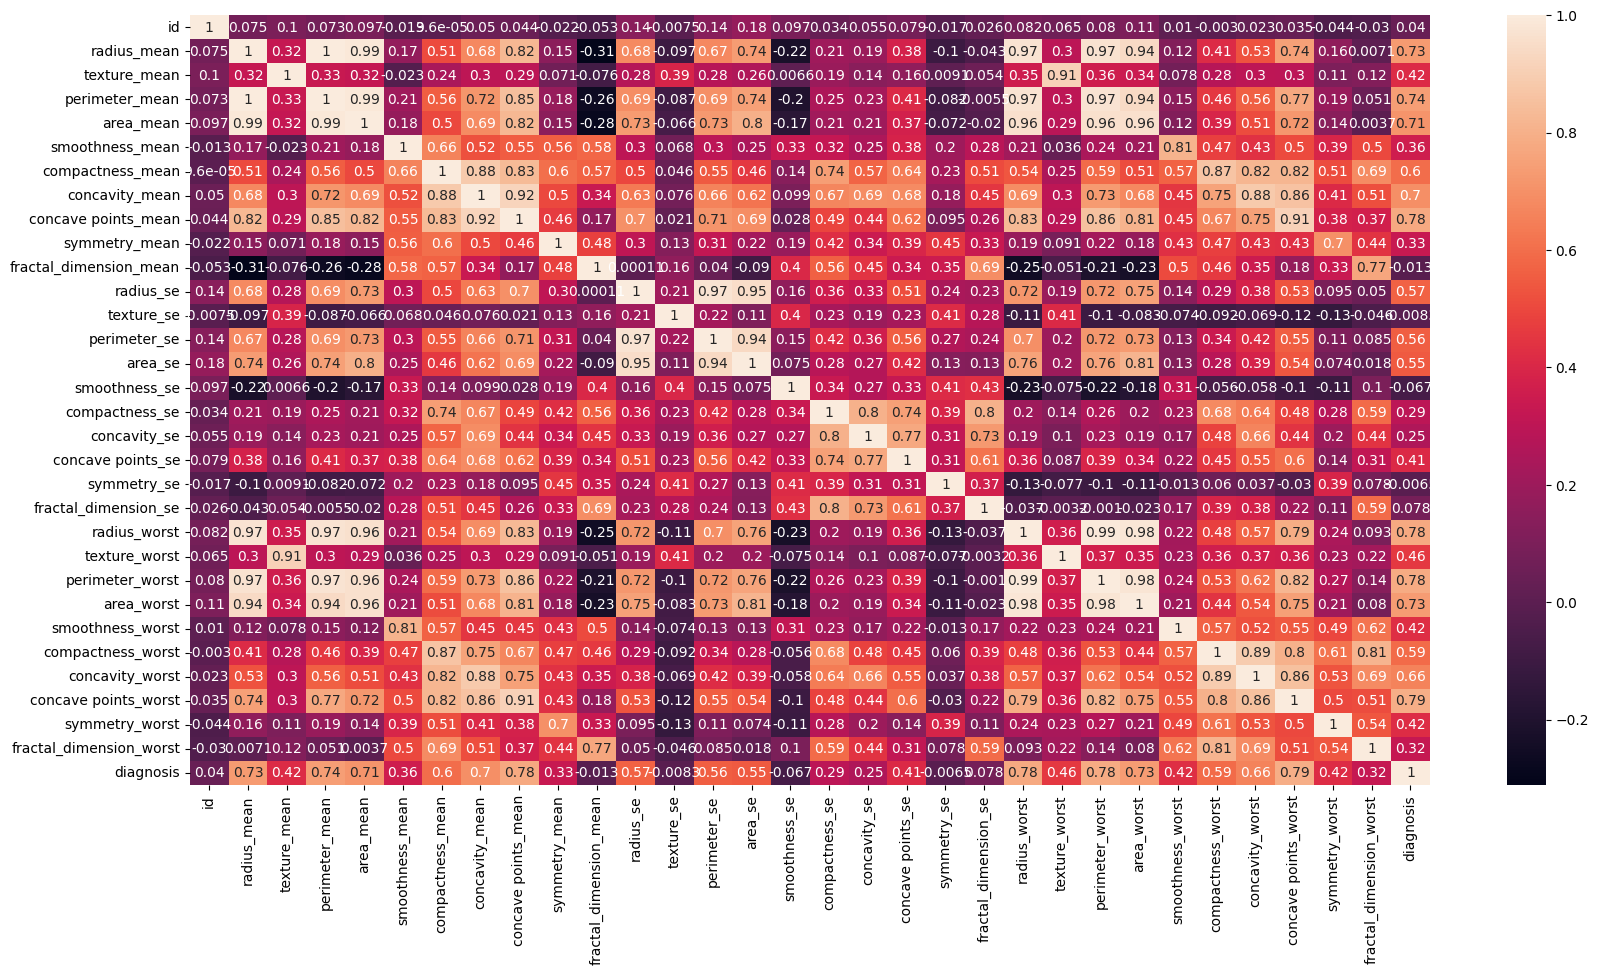

In [27]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot=True)

# SPLITTING INTO TEST AND TRAIN SET

In [28]:
x = dataset.iloc[:, 1:-1]
y = dataset.iloc[:,-1]

In [29]:
print(x)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=0)

print(x_train.head(5))
print(y_test.head(2))

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
478       11.490         14.59           73.99      404.9          0.10460   
303       10.490         18.61           66.86      334.3          0.10680   
155       12.250         17.94           78.27      460.3          0.08654   
186       18.310         18.58          118.60     1041.0          0.08588   
101        6.981         13.43           43.79      143.5          0.11700   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
478           0.08228         0.05308              0.01969         0.1779   
303           0.06678         0.02297              0.01780         0.1482   
155           0.06679         0.03885              0.02331         0.1970   
186           0.08468         0.08169              0.05814         0.1621   
101           0.07568         0.00000              0.00000         0.1930   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
478

## FEATURE SCALING

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [32]:
print(x_train)

[[-0.74998027 -1.09978744 -0.74158608 ... -0.6235968   0.07754241
   0.45062841]
 [-1.02821446 -0.1392617  -1.02980434 ... -0.7612376  -1.07145262
  -0.29541379]
 [-0.53852228 -0.29934933 -0.56857428 ... -0.50470441  0.34900827
  -0.13371556]
 ...
 [-1.3214733  -0.20855336 -1.3143845  ... -0.98621857 -0.69108476
  -0.13148524]
 [-1.24245479 -0.23244704 -1.27759928 ... -1.7562754  -1.55125275
  -1.01078909]
 [-0.74441558  1.13188181 -0.72016173 ... -0.28490593 -1.2308599
   0.20083251]]


In [33]:
print(x_test)

[[-0.21855296  0.31710749 -0.14938447 ...  1.36998461  1.0939611
   1.51560644]
 [-0.27141746  1.44727832 -0.33290634 ... -0.84095647 -0.70686766
  -0.88310324]
 [-0.04604776 -0.84412512 -0.11098232 ... -0.50394228 -1.19298094
  -0.92659449]
 ...
 [-0.13230036 -0.12253613 -0.14574637 ...  0.20087616 -0.06766026
   0.36754897]
 [-0.24637638  0.56799108 -0.28682376 ... -0.90055508 -0.40225771
  -0.95558866]
 [-1.35013142  0.65639767 -1.34712739 ... -1.36545479 -0.72107227
  -0.54576727]]


# PART 2 -  MODEL SELECTION

## LOGISTIC REGRESSION

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

In [74]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [75]:
y_pred_lr = lr.predict(x_test)

Adding metrics to test model

In [76]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score,recall_score

In [77]:
acc = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)

In [78]:
results = pd.DataFrame([['Logistic Regression', acc , f1 , prec, rec]], 
                       columns = ['Model', 'Accuracy', 'F1 score', 'Precision','Recall'])

results

,Model,Accuracy,F1 score,Precision,Recall
0,Logistic Regression,0.976608,0.967742,0.983607,0.952381


### Cross Validation

In [40]:
cm_lr = confusion_matrix(y_test,y_pred_lr)
cm_lr

array([[107,   1],
       [  3,  60]])

In [41]:
from sklearn.model_selection import cross_val_score

accuracy_lr= cross_val_score(lr,x_train,y_train, cv= 15)

print("Accuracy is {:.2f}%".format(accuracy_lr.mean()*100))
print("Accuracy is {:.2f}%".format(accuracy_lr.std()*100)) 

# :.2f helps to round up the figure for e.g., without .2f output is 1.8371173070873825% 

Accuracy is 98.26%
Accuracy is 2.67%


## RANDOM FOREST 

In [42]:
from sklearn.ensemble import RandomForestClassifier


rm = RandomForestClassifier()
rm .fit(x_train,y_train)

RandomForestClassifier()

In [43]:
# y_pred_rm here means prediction done with random forest
y_pred_rm = rm.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

acc_rm = accuracy_score(y_test,y_pred_rm)
f1_rm = f1_score(y_test,y_pred_rm)
rec_rm = recall_score(y_test, y_pred_rm)
prec_rm = precision_score(y_test,y_pred_rm)

In [45]:
results_rm = pd.DataFrame([[' Random Forest', acc_rm , f1_rm , prec_rm, rec_rm]], 
                       columns = ['Model', 'Accuracy', 'F1 score', 'Precision','Recall'])
results_rm

,Model,Accuracy,F1 score,Precision,Recall
0,Random Forest,0.964912,0.952381,0.952381,0.952381


#### Confusion matrix( RANDOM FOREST)

In [46]:
cm_rm = confusion_matrix(y_test,y_pred_rm)
cm_rm

array([[105,   3],
       [  3,  60]])

In [47]:
from sklearn.model_selection import cross_val_score

accuracy_rm = cross_val_score(estimator=rm, X = x_train, y = y_train, cv= 5)

print("Accuracy is {:.2f}%".format(accuracy_rm.mean()*100))
print("Standard Deviation is {:2f}%".format(accuracy_rm.std()*100))

Accuracy is 94.73%
Standard Deviation is 2.150069%


# Comparing the models

In [48]:
result = pd.concat([results, results_rm], axis=0,  ignore_index=True)
print(result)


                 Model  Accuracy  F1 score  Precision    Recall
0  Logistic Regression  0.976608  0.967742   0.983607  0.952381
1        Random Forest  0.964912  0.952381   0.952381  0.952381


**Clearly we can see that logistic Regression Model is better then Random Forest.\
For this reason we are going to choose Logistic regression classifier model.** \
Now its time to tune the parameters for Logistic Regression

# Choosing the parameters for tuning our models

## Randomized Search for the best parameters (Logistic Regression)

In [115]:
para = [{'penalty':['l2', None],
              'C': [0.25,0.5,0.75,1.0,1.25,1.75,2.0],
              'solver': ['newton-cg','lbfgs','liblinear','sag','saga']
              }
              ]

rs = RandomizedSearchCV(lr, param_distributions=para, cv=5, return_train_score=False, n_iter=2)
rs_score = rs.fit(x_train, y_train)


/home/khushal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/khushal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/khushal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/khushal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/khushal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


In [116]:
rs_score.best_score_

0.9824999999999999

## Grid Search for the best parameters (Logistic Regression)

In [104]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(lr, param_grid= para, cv=3,verbose =True,n_jobs=-1)
best_clf = clf.fit(x_train,y_train)


Fitting 3 folds for each of 70 candidates, totalling 210 fits


/home/khushal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/khushal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/khushal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/khushal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/khushal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/khushal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1

## Final Comparision 

In [117]:

print(f"Accuracy without choosen appropriate Parameters for Logistic Regression : {accuracy_lr.mean()*100}")
print(f"Accuracy with choosen Parameters for Logistic Regression using GridSearchCV : {best_clf.score(x_train,y_train)}")
print(f"Accuracy with choosen Parameters for Logistic Regression using RandomSearchCV : {rs_score.score(x_train,y_train)}")


Accuracy without choosen appropriate Parameters for Logistic Regression : 98.26210826210827
Accuracy with choosen Parameters for Logistic Regression using GridSearchCV : 0.9899497487437185
Accuracy with choosen Parameters for Logistic Regression using RandomSearchCV : 0.9899497487437185


 **THIS IS THE FINAL MODEL AND PARAMETER FOR PREDICTING BREAST CANCER IN A POPULATION**